## Asteroid Diameter Prediction
#### AML Advance Python
**Vahid Hadavi**

**Team Members**:
- Kshitiz Bhattarai
- Mandil Karki
- Pranay Gurung
- Raj Kumar Phagami
- Yug Dev Bhandari

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\Yug Dev\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Reading Dataset

Importing Datasets and converting into pandas dataframe

In [2]:
asteroid_df = pd.read_csv("Asteroid.csv", low_memory=False)
asteroid_df.head(5)

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


In [3]:
asteroid_df.shape

(839736, 27)

In [4]:
asteroid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839736 entries, 0 to 839735
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       839736 non-null  object 
 1   a               839734 non-null  float64
 2   e               839736 non-null  float64
 3   G               119 non-null     float64
 4   i               839736 non-null  float64
 5   om              839736 non-null  float64
 6   w               839736 non-null  float64
 7   q               839736 non-null  float64
 8   ad              839730 non-null  float64
 9   per_y           839735 non-null  float64
 10  data_arc        823947 non-null  float64
 11  condition_code  838743 non-null  object 
 12  n_obs_used      839736 non-null  int64  
 13  H               837042 non-null  float64
 14  diameter        137681 non-null  object 
 15  extent          18 non-null      object 
 16  albedo          136452 non-null  float64
 17  rot_per   

Statistical Description

In [5]:
asteroid_df.describe()

,a,e,G,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,moid
count,839734.000000,839736.000000,119.000000,839736.000000,839736.000000,839736.000000,839736.000000,839730.000000,839735.000000,823947.000000,839736.000000,837042.000000,136452.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,8.228140e+05
mean,2.843217,0.155633,0.178739,8.950009,168.501641,181.076593,2.404732,3.385707,6.859544,5660.187025,254.617708,16.786069,0.130052,21.136772,7.821928e+00,0.769212,0.364396,-0.33,1.423511e+00
std,37.327031,0.093888,0.134603,6.666273,103.096571,104.024110,2.233138,12.746419,252.172503,4192.420393,363.004548,1.821274,0.109983,73.131751,1.678880e+01,0.088625,0.095780,NaN,2.251048e+00
min,-32588.942986,0.000000,-0.250000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,3.437640e-07
25%,2.385244,0.091453,0.100000,4.069043,80.212344,91.039551,1.971939,2.775342,3.683896,3599.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,9.785395e-01
50%,2.644219,0.143654,0.190000,7.257311,160.296065,181.669812,2.225494,3.037745,4.299860,5792.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,1.237880e+00
75%,2.996035,0.199400,0.250000,12.256026,252.206645,271.523344,2.578162,3.357958,5.185951,7228.000000,292.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,1.590610e+00
max,3043.149073,1.201134,0.600000,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,7.950130e+01


### Checking and Handling Missing Values 

In [6]:
asteroid_df.isnull().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [7]:
#percentage of missing values
percent_missing_values = asteroid_df.isnull().mean()*100
percent_missing_values  = percent_missing_values.to_dict()

In [8]:
missing_value = pd.DataFrame({'column': percent_missing_values.keys(),'percentage': percent_missing_values.values()})
missing_value.sort_values('percentage', ascending=False)
missing_value.head()

TypeError: '<' not supported between instances of 'dict_values' and 'dict_values'

**Removing the columns having the percentage of missing values **

Filtering the columns of  missing values

In [47]:
columns_to_drop = missing_value["column"][missing_value["percentage"]>83.7]
columns_to_drop 

3           G
15     extent
16     albedo
17    rot_per
18         GM
19         BV
20         UB
21         IR
22     spec_B
23     spec_T
Name: column, dtype: object

In [48]:
asteroid_df.drop(columns = columns_to_drop, inplace = True)

In [49]:
asteroid_df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.4,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.4,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,N,N,1.09589


After dropping the columns we got 17 columns out of 27

In [51]:
asteroid_df.shape

(839736, 17)

#### Deleting rows with missing values

In [52]:
cleaned_df= asteroid_df.dropna()
cleaned_df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.4,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.4,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,N,N,1.09589


After deleting the rows with missing values we got 136799 rows out of 839736 

In [53]:
cleaned_df.shape

(136799, 17)

In [ ]:
# dropped rows in which 'diameter','data_arc' or 'albedo' value is missing
# df=df.dropna(subset = ['diameter', 'albedo', 'data_arc'])

In [54]:
cleaned_df.isnull().sum()

full_name         0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
neo               0
pha               0
moid              0
dtype: int64

### Feature Engineering

Checking the datatypes

In [56]:
cleaned_df.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
diameter           object
neo                object
pha                object
moid              float64
dtype: object

the datatype of diameter is object which points to the string. as our goal is to predict the diameter its should be in float

In [59]:
convert = {'diameter':float, 'condition_code':int}
cleaned_df = cleaned_df.astype(convert)

In [62]:
cleaned_df.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int32
n_obs_used          int64
H                 float64
diameter          float64
neo                object
pha                object
moid              float64
dtype: object

### Detecting and Handling Outliers

In [64]:
cleaned_df.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,moid
count,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000,136799.000000
mean,2.815888,0.145463,10.303347,169.803300,181.884334,2.403829,3.227947,4.888089,8956.946966,0.434097,663.578045,15.176059,5.500852,1.421257
std,1.526870,0.077461,6.798582,102.707099,103.555784,0.516640,2.904628,25.610338,6132.104613,1.859232,581.451742,1.407433,9.411398,0.512734
min,0.626226,0.000489,0.021855,0.000735,0.004466,0.081882,0.999956,0.495569,1.000000,0.000000,5.000000,3.200000,0.002500,0.000166
25%,2.538616,0.089683,5.099060,82.320868,91.883804,2.070107,2.866315,4.044861,6283.000000,0.000000,218.000000,14.400000,2.782000,1.083570
50%,2.751931,0.138552,9.351827,160.454411,183.642049,2.365466,3.168750,4.565250,7508.000000,0.000000,488.000000,15.300000,3.969000,1.386400
75%,3.092843,0.191057,13.684521,256.090771,271.735774,2.686515,3.469049,5.439325,9667.000000,0.000000,962.000000,16.100000,5.758000,1.700150
max,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,72684.000000,9.000000,9325.000000,29.900000,939.400000,39.507000


In [66]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = cleaned_df.select_dtypes(include=numerics)
num_data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,moid
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,1.59478
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,1.23324
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,1.03454
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,1.13948
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,1.09589


In [75]:
Q1 = num_data.quantile(0.25)
Q3 =num_data.quantile(0.75)
IQR = Q3-Q1
IQR

a                    0.554228
e                    0.101374
i                    8.585461
om                 173.769903
w                  179.851970
q                    0.616408
ad                   0.602733
per_y                1.394464
data_arc          3384.000000
condition_code       0.000000
n_obs_used         744.000000
H                    1.700000
diameter             2.976000
moid                 0.616580
dtype: float64

In [110]:
# outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    if IQR > 0:
        print("IQR value for column %s is: %s" % (col, IQR))
        global outlier_free_list
        global filtered_data

        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        outlier_free_list = [x for x in data[col] if (
            (x > lower_range) & (x < upper_range))]
        filtered_data = data.loc[data[col].isin(outlier_free_list)]

for i in num_data.columns:
    if i == num_data.columns[0]:
      removeOutliers(num_data, i)
    else:
      removeOutliers(filtered_data, i)
 

IQR value for column a is: 0.5542275791564508
IQR value for column q is: 0.6025733541090594
IQR value for column data_arc is: 3372.0
IQR value for column n_obs_used is: 613.0
IQR value for column H is: 1.4000000000000021
IQR value for column diameter is: 2.5482500000000003
IQR value for column moid is: 0.58823


In [90]:
filtered_data.shape

(102544, 14)

### Visualization

#### Feature Selection

In [63]:
#getting the heat map to check the correlation between the numerical variables
cleaned_df.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,neo,pha,moid
0,1 Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,N,N,1.59478
1,2 Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,N,N,1.23324
2,3 Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,N,N,1.03454
3,4 Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,N,N,1.13948
4,5 Astraea,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,N,N,1.09589


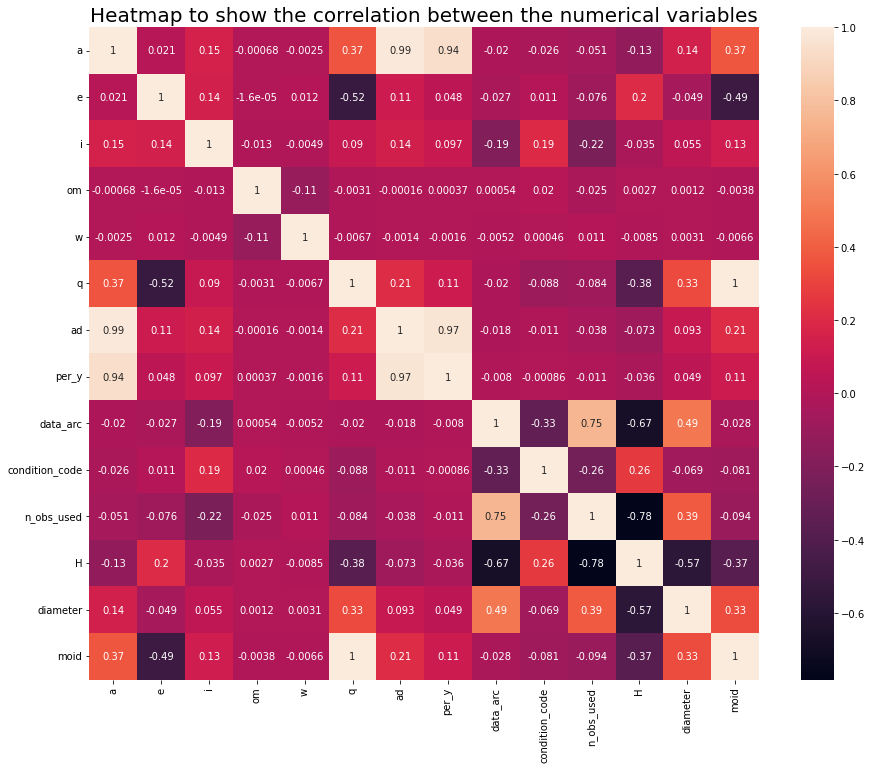

In [72]:
correlation=num_data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(correlation,annot=True,annot_kws={'size':10})
plt.title("Heatmap to show the correlation between the numerical variables", fontsize=20)
plt.savefig("heamap.jpg")

From the heatmap we can see that a, q, ad, per_y,moid, per: all these features are strongly correlated. similarly, 
H is the only variable is positively correlated with diameter. However, rot_per, e,i, w and om are less correlated with the diameter.

In [112]:
# Dropping the columns with low correlation
cleaned_df.drop(['om', 'w', 'per_y', 'e', 'i', 'condition_code', 'ad'],axis=1, inplace=True)
cleaned_df.shape

(136799, 10)

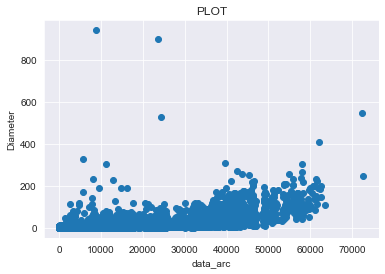

In [93]:
sns.set_style('darkgrid')

plt.scatter(num_data.data_arc , num_data.diameter)
plt.xlabel('data_arc')
plt.ylabel('Diameter')
plt.title('PLOT')
plt.show()

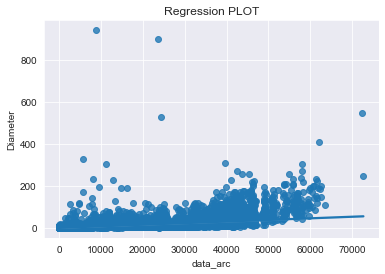

In [98]:
sns.set_style('darkgrid')

sns.regplot(x="data_arc",y="diameter",data=num_data)
plt.xlabel('data_arc')
plt.ylabel('Diameter')
plt.title('Regression PLOT')
plt.show()

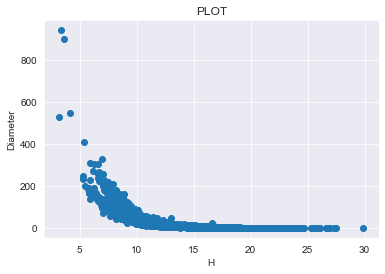

In [103]:
plt.scatter(num_data.H , num_data.diameter)
plt.xlabel('H')
plt.ylabel('Diameter')
plt.title('PLOT')
plt.show()

### Handling Categorical Columns

In [113]:
cleaned_df.drop(['full_name'], axis =1 , inplace = True)

In [116]:
categoricalData = cleaned_df.select_dtypes(include=['object']).copy()
categoricalData.head(5)

,neo,pha
0,N,N
1,N,N
2,N,N
3,N,N
4,N,N


In [123]:
categoricalData.neo.unique()

array(['N', 'Y'], dtype=object)

### OneHotEncoding

In [135]:
new_cols = pd.get_dummies(categoricalData, columns=['neo','pha'], drop_first=True)
new_cols.neo_Y.unique()

array([0, 1], dtype=uint8)

In [136]:
#concatenating the dataframes
new_df = pd.concat([cleaned_df,new_cols],axis = 1)
new_df.head()

,a,q,data_arc,n_obs_used,H,diameter,neo,pha,moid,neo_Y,pha_Y
0,2.769165,2.558684,8822.0,1002,3.34,939.400,N,N,1.59478,0,0
1,2.772466,2.133865,72318.0,8490,4.13,545.000,N,N,1.23324,0,0
2,2.669150,1.983332,72684.0,7104,5.33,246.596,N,N,1.03454,0,0
3,2.361418,2.151909,24288.0,9325,3.20,525.400,N,N,1.13948,0,0
4,2.574249,2.082324,63431.0,2861,6.85,106.699,N,N,1.09589,0,0


In [137]:
#dcropping the categorical variables neo and pha after changing to numerical
new_df = new_df.drop(['neo' , 'pha'], axis = 1)
new_df.head()

,a,q,data_arc,n_obs_used,H,diameter,moid,neo_Y,pha_Y
0,2.769165,2.558684,8822.0,1002,3.34,939.400,1.59478,0,0
1,2.772466,2.133865,72318.0,8490,4.13,545.000,1.23324,0,0
2,2.669150,1.983332,72684.0,7104,5.33,246.596,1.03454,0,0
3,2.361418,2.151909,24288.0,9325,3.20,525.400,1.13948,0,0
4,2.574249,2.082324,63431.0,2861,6.85,106.699,1.09589,0,0


### Removing Outliers (using z score)

In [138]:
from scipy import stats

total_outliers = len(new_df)- len(new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis=1)])

print("Number of outliers : " , total_outliers)

Number of outliers :  5992


In [139]:
new_df = pd.DataFrame(new_df[(np.abs(stats.zscore(new_df)) < 3).all(axis=1)])
new_df.shape

(130807, 9)

### Scaling the data

In [140]:
scaled_data = pd.DataFrame(StandardScaler().fit_transform(new_df), columns = new_df.columns)
scaled_data

,a,q,data_arc,n_obs_used,H,diameter,moid,neo_Y,pha_Y
0,-1.538299,-1.243929,3.662787,3.164093,-2.406019,0.788395,-1.218612,0.0,0.0
1,-1.179186,-1.202080,3.411170,3.031944,-2.147332,5.662904,-1.173144,0.0,0.0
2,-1.678465,-1.180167,2.839956,3.107735,-1.888644,0.562984,-1.233494,0.0,0.0
3,1.265968,-0.124625,3.480917,2.104963,-3.190705,7.494720,0.027286,0.0,0.0
4,-0.166420,-0.377176,3.372766,3.350655,-2.923395,2.134873,-0.379936,0.0,0.0
...,...,...,...,...,...,...,...,...,...
130802,1.159891,0.787880,-1.316356,-1.115179,0.784462,-0.274206,0.733838,0.0,0.0
130803,-0.666722,-0.063019,-1.112414,-1.148216,1.732983,-0.660574,-0.071347,0.0,0.0
130804,1.086634,0.203542,-1.213502,-1.121009,1.301837,-0.582737,0.122107,0.0,0.0
130805,0.808277,-0.554675,-1.352774,-1.159877,1.646754,-0.458057,-0.617314,0.0,0.0


### Splitting the data

In [144]:
X = scaled_data.drop(['diameter'], axis = 1)
Y = scaled_data.diameter

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.1,random_state=30)

### Building the models

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

poly_reg = PolynomialFeatures(2)
poly_reg = PolynomialFeatures(2)
new_x_train = poly_reg.fit_transform(X_train)
new_x_test = poly_reg.fit_transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(new_x_train , y_train)

ridge_reg = Ridge(alpha=0.01)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train,y_train)



C:\Users\Asus\anaconda3\envs\aivenv\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Lasso(alpha=0.1)

In [ ]:
models = ["Linear Regression","Polynomial Regression",""]

### Using Neural Networks

In [156]:
import tensorflow as tf
from tensorflow import keras

In [159]:
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    ANN= keras.Sequential([
        #input layer
        keras.layers.Dense(60, input_dim=X_train.shape[1],activation="relu"),
        #hidden layers
        keras.layers.Dropout(0.4), 
        keras.layers.Dense(40,activation="relu"),
        keras.layers.Dropout(0.4), 
        keras.layers.Dense(20,activation="relu"),
        keras.layers.Dropout(0.3),  
        #output layer
        keras.layers.Dense(1, activation='linear')
    ])
    return ANN

# build the model
ANN = build_model_using_sequential()

In [161]:
ANN.compile(loss="mean_squared_error", optimizer='adam', metrics=["mse"])

In [162]:
ANN.fit(X_train, y_train, epochs=10, batch_size=64,validation_split=0.2)

Epoch 1/10
1472/1472 [==============================] - 5s 3ms/step - loss: 0.4024 - mse: 0.4024 - val_loss: 0.2528 - val_mse: 0.2528
Epoch 2/10
1472/1472 [==============================] - 3s 2ms/step - loss: 0.3259 - mse: 0.3259 - val_loss: 0.2591 - val_mse: 0.2591
Epoch 3/10
1472/1472 [==============================] - 3s 2ms/step - loss: 0.3111 - mse: 0.3111 - val_loss: 0.2486 - val_mse: 0.2486
Epoch 4/10
1472/1472 [==============================] - 4s 3ms/step - loss: 0.3033 - mse: 0.3033 - val_loss: 0.2583 - val_mse: 0.2583
Epoch 5/10
1472/1472 [==============================] - 4s 3ms/step - loss: 0.3016 - mse: 0.3016 - val_loss: 0.2457 - val_mse: 0.2457
Epoch 6/10
1472/1472 [==============================] - 4s 3ms/step - loss: 0.3008 - mse: 0.3008 - val_loss: 0.2522 - val_mse: 0.2522
Epoch 7/10
1472/1472 [==============================] - 4s 3ms/step - loss: 0.2962 - mse: 0.2962 - val_loss: 0.2636 - val_mse: 0.2636
Epoch 8/10
1472/1472 [==============================] - 4s 3ms

In [163]:
ANN.evaluate(X_test,y_test)

409/409 [==============================] - 1s 2ms/step - loss: 0.2670 - mse: 0.2670


[0.2669929563999176, 0.2669929563999176]

In [166]:
y_pred=ANN.predict(X_test)
r2_score(y_test,y_pred)

0.7346460771120533

In [167]:
ANN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 60)                540       
                                                                 
 dropout_6 (Dropout)         (None, 60)                0         
                                                                 
 dense_9 (Dense)             (None, 40)                2440      
                                                                 
 dropout_7 (Dropout)         (None, 40)                0         
                                                                 
 dense_10 (Dense)            (None, 20)                820       
                                                                 
 dropout_8 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                